
# Customer Segmentation

Through segmentation analysis, we aim to uncover meaningful patterns within this data to better understand and target different customer segments. The project aims is to create clusters or groups of these customers to foster marketing decisions and for better undertsanding of customer characteristics which could ultimately impact sales and profit generation.

# Objective Statement
- Derive business insight about how many product sold every month.

- Obtain business insight about how much customer spend their money every month.

- To reduce risk in deciding where, when, how, and to whom a product, service, or brand will be marketed.

- To increase marketing efficiency by directing effort specifically toward the designated segment in a manner consistent with that segment’s characteristics.

# Methodology / Analytic Technique:

- Descriptive analysis

- Exploratory analysis

- Segment Analysis

In [1]:
#Importing Packages

! pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [2]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Import Dataset
df= pd.read_excel('/content/Online Retail.xlsx')

In [5]:
#Check Dataset

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


- The min and max value for Quantity is 80995, this could represent cancelled or returned orders.
- The UnitPrice also have few negative values which is uncommon,these transactions could represent cancelled orders by customers or bad-debt incurred by the business.
- Bad debt adjustments will be dropped from the dataset as these do not represent actual sales.
- We need to clean the above values by removing from the dataset.

In [8]:
# checking the uniqueness within the data
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [9]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


There are almost 25% missing CustomerID. We need to remove them as there is no way we can get the number of CustomerID.

In [10]:
#Country

df.Country.value_counts(normalize=True)

,proportion
Country,
United Kingdom,0.914320
Germany,0.017521
France,0.015790
EIRE,0.015124
Spain,0.004674
Netherlands,0.004375
Belgium,0.003818
Switzerland,0.003694
Portugal,0.002803


We can see that there is maximum proportion (More than 90% of customers) of 'United Kingdom' customers. So we will take 'United Kingdom' customer for our analysis.

In [11]:
df = df[df.Country == 'United Kingdom']

Removing the negative values from Quantity and UnitPrice

In [12]:
#Quantity

df = df[df.Quantity > 0]


In [13]:
#InvoiceDate

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [14]:
#timebound

print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())
print("The data is from 1 year transaction")

2010-12-01 08:26:00
2011-12-09 12:49:00
The data is from 1 year transaction


In [15]:
#UnitPrice

df = df[df.UnitPrice > 0]


Removing the Null values from the data.

In [16]:
#CustomerID

df = df[pd.notnull(df['CustomerID'])]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         354321 non-null  object        
 1   StockCode         354321 non-null  object        
 2   Description       354321 non-null  object        
 3   Quantity          354321 non-null  int64         
 4   InvoiceDate       354321 non-null  datetime64[ns]
 5   UnitPrice         354321 non-null  float64       
 6   CustomerID        354321 non-null  float64       
 7   Country           354321 non-null  object        
 8   InvoiceYearMonth  354321 non-null  int64         
 9   Date              354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 29.7+ MB


# Exploratory Data Analysis

How many product sold every month?

In [18]:
#Aggregating the Orders by Month

df_agg= df.groupby("Date").Quantity.sum()
df_agg.head()


,Quantity
Date,
2010-12,267767
2011-01,278251
2011-02,213375
2011-03,276304
2011-04,260448


In [20]:
#converting series to dataframe and resetting index.

df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

,index,Date,Quantity
0,0,2010-12,267767
1,1,2011-01,278251
2,2,2011-02,213375
3,3,2011-03,276304
4,4,2011-04,260448


In [21]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:green', marker='o')
    plt.show()

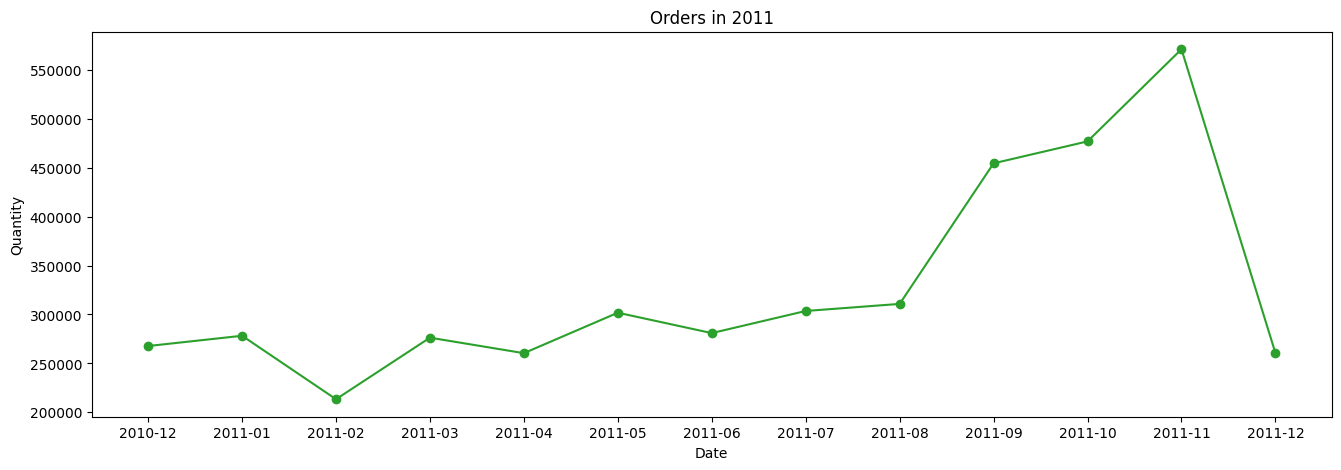

In [22]:
plot_df(df_agg, x=df_agg.Date, y=df_agg.Quantity,title='Orders in 2011')

How much customer spend their money every month?

<Axes: ylabel='Revenue'>

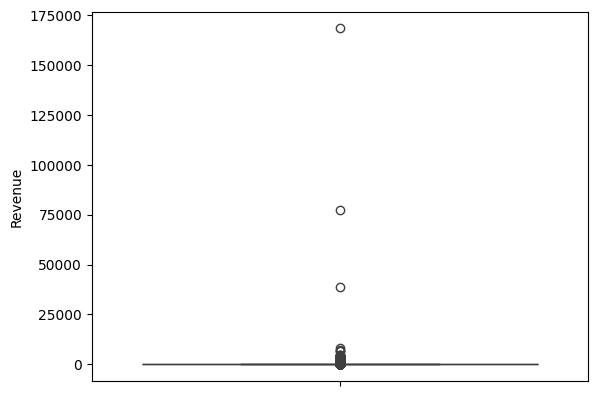

In [23]:
#Calculating Revenue
#Revenue = Order Count * Average Revenue per Order

df['Revenue'] = df['Quantity']*df['UnitPrice']


sns.boxplot(y=df['Revenue'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         354321 non-null  object        
 1   StockCode         354321 non-null  object        
 2   Description       354321 non-null  object        
 3   Quantity          354321 non-null  int64         
 4   InvoiceDate       354321 non-null  datetime64[ns]
 5   UnitPrice         354321 non-null  float64       
 6   CustomerID        354321 non-null  float64       
 7   Country           354321 non-null  object        
 8   InvoiceYearMonth  354321 non-null  int64         
 9   Date              354321 non-null  object        
 10  Revenue           354321 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 32.4+ MB


In [25]:
#Monthly Revenue

df_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,498661.850
1,201101,442190.060
2,201102,355655.630
3,201103,467198.590
4,201104,409559.141


In [26]:
plot_data = [
    go.Scatter(
        x=df_revenue['InvoiceYearMonth'],
        y=df_revenue['Revenue'],
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# RFM Analysis

- Recency Frequency Monetary (RFM)

- RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who spend the most money.

- Recency — how long it’s been since a customer bought something from us.

- Frequency — how often a customer buys from us.

- Monetary value — the total value of purchases a customer has made.

The last invoice date is 2011–12–09, we will use this date to calculate Recency.

In [27]:
NOW = dt.date(2011,12,9)
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date


In [30]:
#Recency

df_recency = df.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()


,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [31]:
#Frequency - Monetarty

FM_Table = df.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'Revenue'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'Revenue':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12747.0,103,4196.01
12748.0,4595,33719.73
12749.0,199,4090.88
12820.0,59,942.34


In [32]:
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


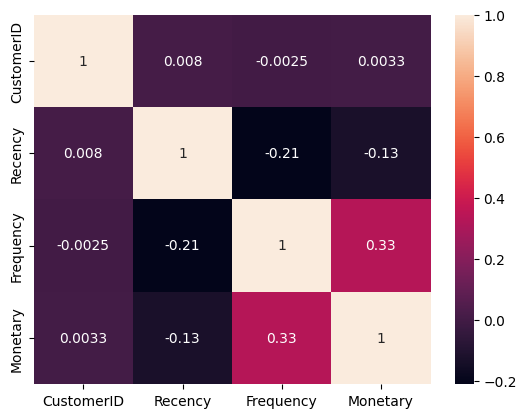

In [33]:
#Heatmap check
sns.heatmap(RFM_Table.corr(), annot=True);

# Modeling Data: RFM Quantiles

- we will split the metrics into segments using quantiles.

- We will assign a score from 1 to 4 to each Recency, Frequency and Monetary respectively.

- 1 is the highest value, and 4 is the lowest value.

- A final RFM score (Overall Value) is calculated simply by combining individual RFM score numbers.

In [34]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()


segmented_rfm = RFM_Table.copy()


def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [35]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4595,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


Calculating the total RFM score combined.

RFM_Score = R_quartile + F_quartile + M_quartile

In [36]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)


segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,12346.0,325,1,77183.60,4,4,1,441
1,12747.0,2,103,4196.01,1,1,1,111
2,12748.0,0,4595,33719.73,1,1,1,111
3,12749.0,3,199,4090.88,1,1,1,111
4,12820.0,3,59,942.34,1,2,2,122


In [37]:

segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)


segmented_rfm.head()



,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4595,33719.73,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


In [38]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))



Best Customers:  409
Loyal Customers:  980
Big Spenders:  980
Almost Lost:  21
Lost Customers:  168
Lost Cheap Customers:  343


In [39]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"

    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"

    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"

    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"

    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"

    else:
        label[i] = "Others"



In [40]:
# Adding the 'Label' column to our dataframe

segmented_rfm['Label'] = label


# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

,count
Label,
Others,2135
Loyal Customers,571
Best Customers,409
Lost Cheap Customers,343
Big Spenders,273
Lost Customers,168
Almost Lost,21


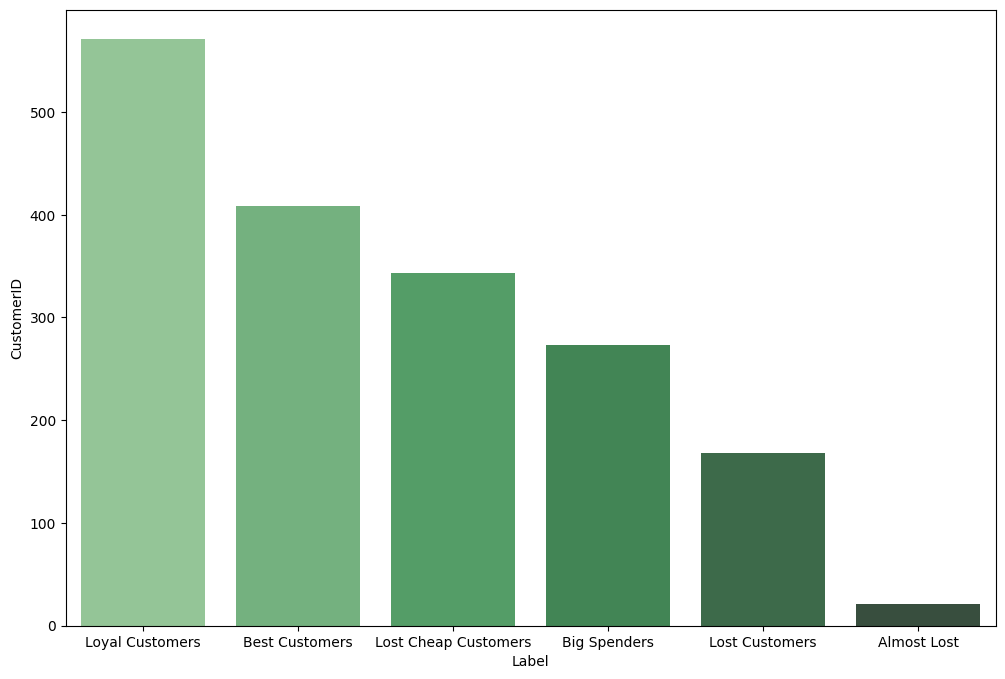

In [44]:
import seaborn as sns
sq1=segmented_rfm.groupby('Label')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1, x="Label", y="CustomerID", palette = "Greens_d");

# Modeling Data: K-Means Clustering

K-Means clustering algorithm is an unsupervised machine learning algorithm that uses multiple iterations to segment the unlabeled data points into K different clusters in a way such that each data point belongs to only a single group that has similar properties.

In [45]:
RFM_Table_New = RFM_Table.drop('CustomerID', axis=1)


RFM_Table_New.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4595,33719.73
3,3,199,4090.88
4,3,59,942.34


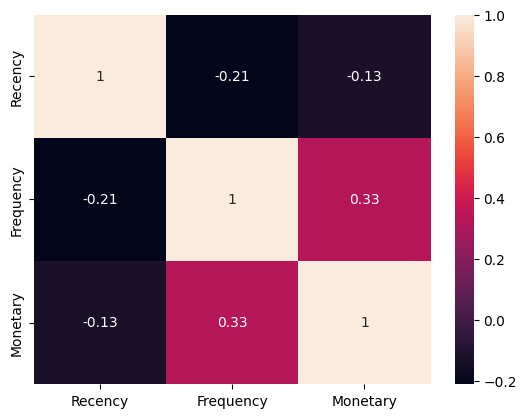

In [46]:
#Heatmap check
sns.heatmap(RFM_Table_New.corr(), annot=True);

<Axes: xlabel='Recency', ylabel='Density'>

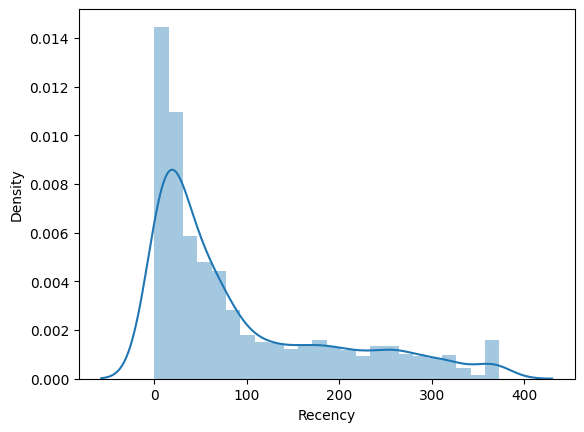

In [47]:
#Analyze distribution

sns.distplot(RFM_Table_New['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

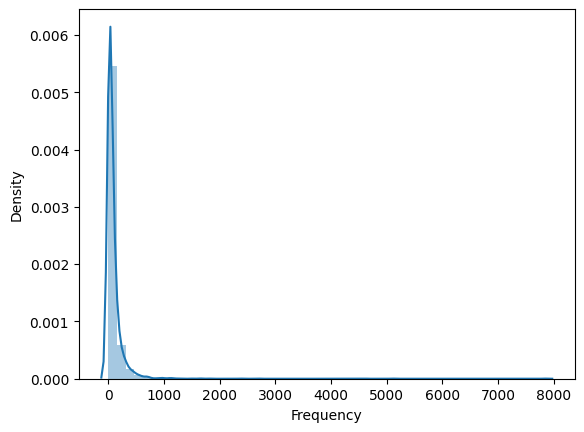

In [48]:
sns.distplot(RFM_Table_New['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

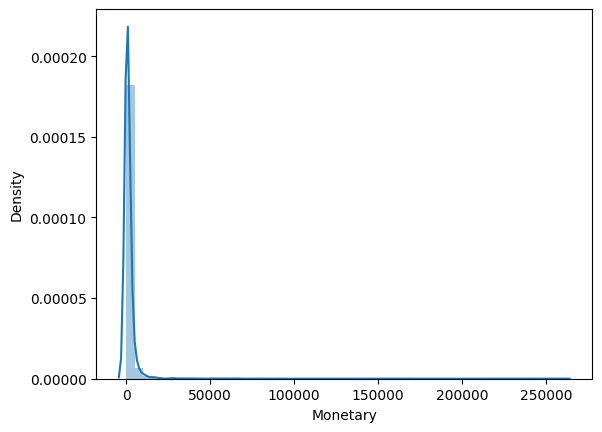

In [49]:
sns.distplot(RFM_Table_New['Monetary'])

- K-means gives the best result under the following conditions:
- Data’s distribution is not skewed.
- Data is standardised.

The data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable. I added a small constant as log transformation demands all the values to be positive.

In [50]:
df_rfm_log = RFM_Table_New.copy()
df_rfm_log.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4595,33719.73
3,3,199,4090.88
4,3,59,942.34


In [51]:
df_rfm_log = np.log(df_rfm_log+1)

In [52]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [53]:
Winsorizer(capping_method='gaussian', fold=2, missing_values='raise',
           tail='both', variables=['Recency', 'Frequency', 'Monetary'])

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [54]:
df_rfm_log = windsoriser.transform(df_rfm_log)


Once the skewness is reduced, I standardised the data by centring and scaling. Note all the variables now have a mean of 0 and a standard deviation of 1.

In [55]:
# Developing preprocessing with StandardScaler

scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_New_scaled = scaler.transform(df_rfm_log)


In [56]:
RFM_Table_New_scaled = pd.DataFrame(RFM_Table_New_scaled, columns=RFM_Table_New.columns)
RFM_Table_New_scaled.head()

,Recency,Frequency,Monetary
0,1.465314,-2.075553,2.144184
1,-2.017962,0.758501,1.551863
2,-2.065658,2.072989,2.144184
3,-1.804222,1.296773,1.530119
4,-1.804222,0.305737,0.272403


<Axes: xlabel='Recency', ylabel='Density'>

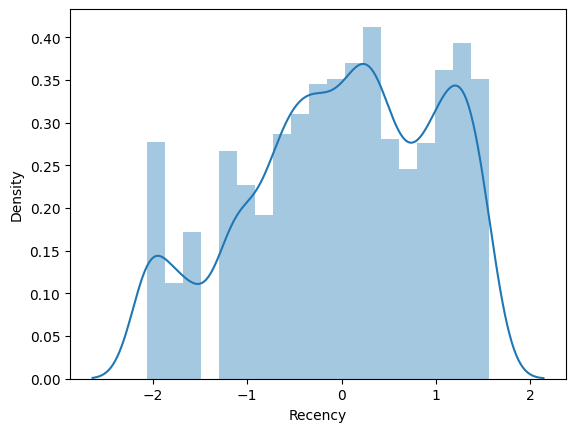

In [57]:
#Analyze distribution

sns.distplot(RFM_Table_New_scaled['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

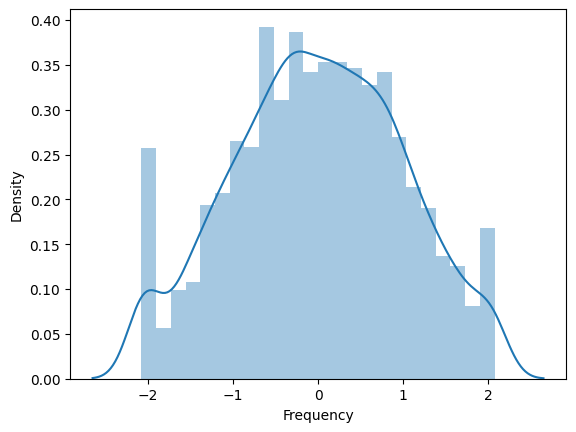

In [58]:
sns.distplot(RFM_Table_New_scaled['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

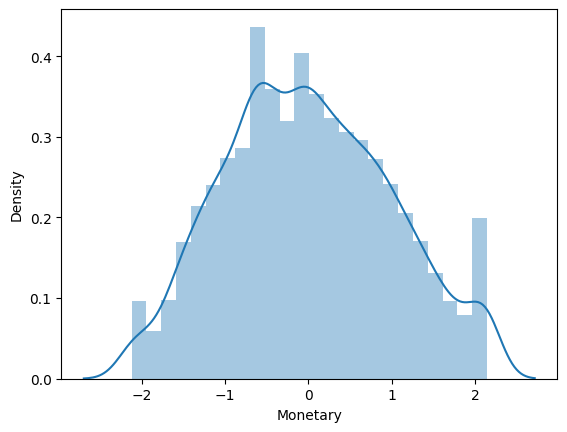

In [59]:
sns.distplot(RFM_Table_New_scaled['Monetary'])

Finding the optimal number of clusters

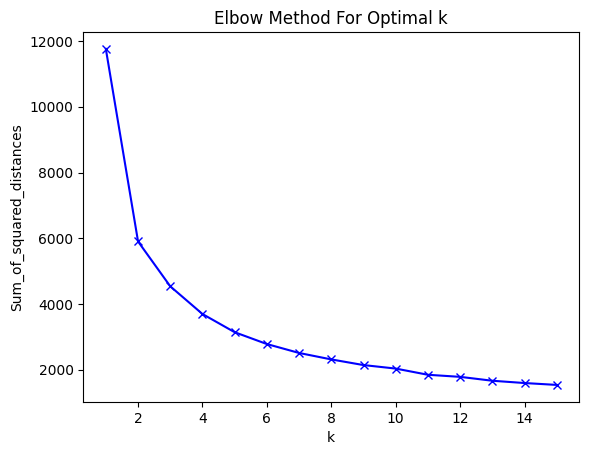

In [60]:
X = np.asarray(RFM_Table_New_scaled)


Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [61]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

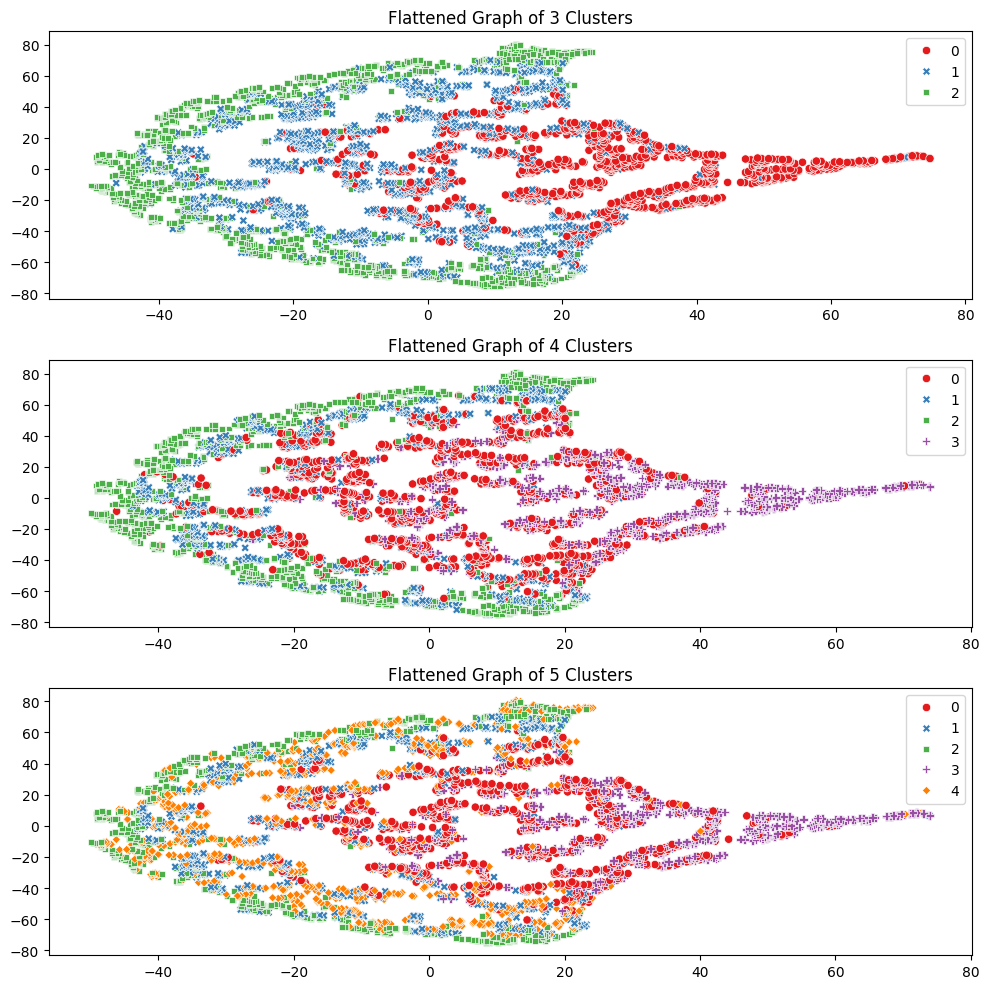

In [62]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, RFM_Table)

plt.tight_layout()

In [63]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm,
                                       index=RFM_Table.index,
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(),
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'],
                        var_name='Metric',
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

    return


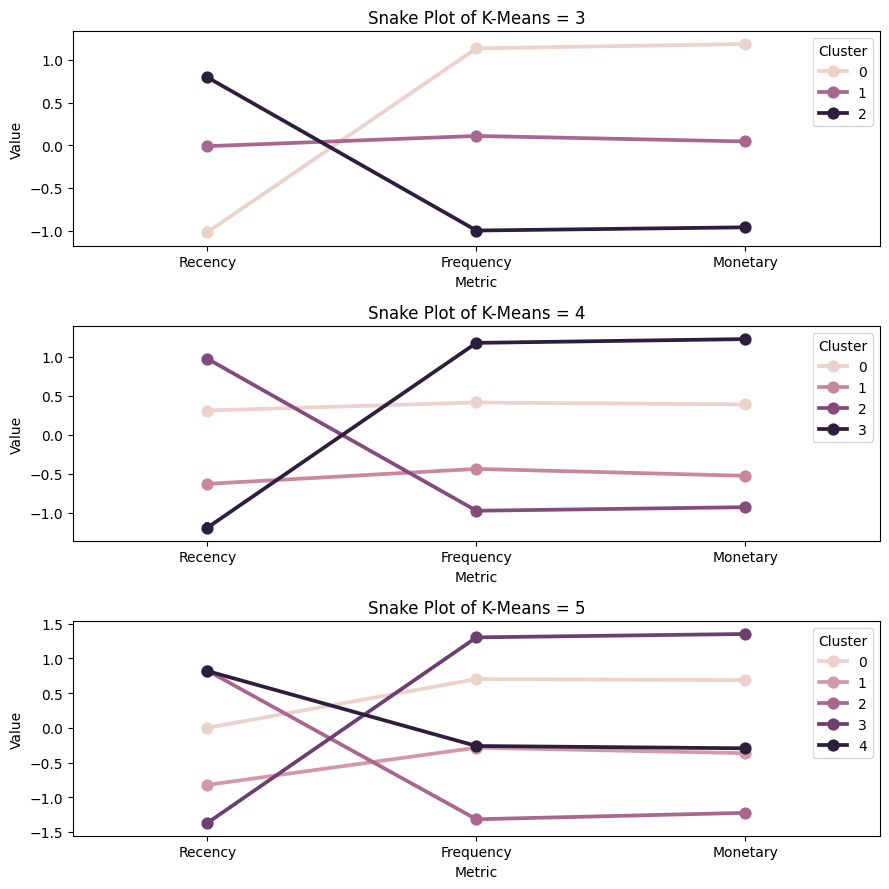

In [64]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_New_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_New_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_New_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

# Evaluating Model: K-Means Clustering
Davies Bouldin Score is a metric for evaluating clustering algorithms. The smaller Davies Bouldin Score is The more optimal the cluster.

K-Means = 3

In [65]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [76]:
#!pip install -U scikit-learn # Upgrade scikit-learn to the latest version

from sklearn.cluster import KMeans
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)


KMeans(algorithm='auto', n_clusters=3, n_init=10)

In [77]:
kmeans = KMeans(n_clusters=3) # Initialize KMeans with desired number of clusters
kmeans.fit(X)  # Fit the model to your data 'X'

print(davies_bouldin_score(X, kmeans.labels_))



1.1089056593441395


In [78]:
# k-means = 4
kmeans = KMeans(n_clusters=4) # Initialize KMeans with desired number of clusters
kmeans.fit(X)

KMeans(n_clusters=4)

In [79]:
from sklearn.cluster import KMeans
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

print(davies_bouldin_score(X, kmeans.labels_))

1.0653485823909585


In [80]:
# k-means = 5
kmeans = KMeans(n_clusters=5) # Initialize KMeans with desired number of clusters
kmeans.fit(X)

KMeans(n_clusters=5)

In [81]:
from sklearn.cluster import KMeans
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

print(davies_bouldin_score(X, kmeans.labels_))

1.0687291835909494


K-Means 4 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 4.

In [82]:
df_rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,0
1,12747.0,2,103,4196.01,3
2,12748.0,0,4595,33719.73,3
3,12749.0,3,199,4090.88,3
4,12820.0,3,59,942.34,3


In [83]:
df_rfm_k4.Cluster.value_counts()

,count
Cluster,
2,1173
0,1130
3,854
1,763


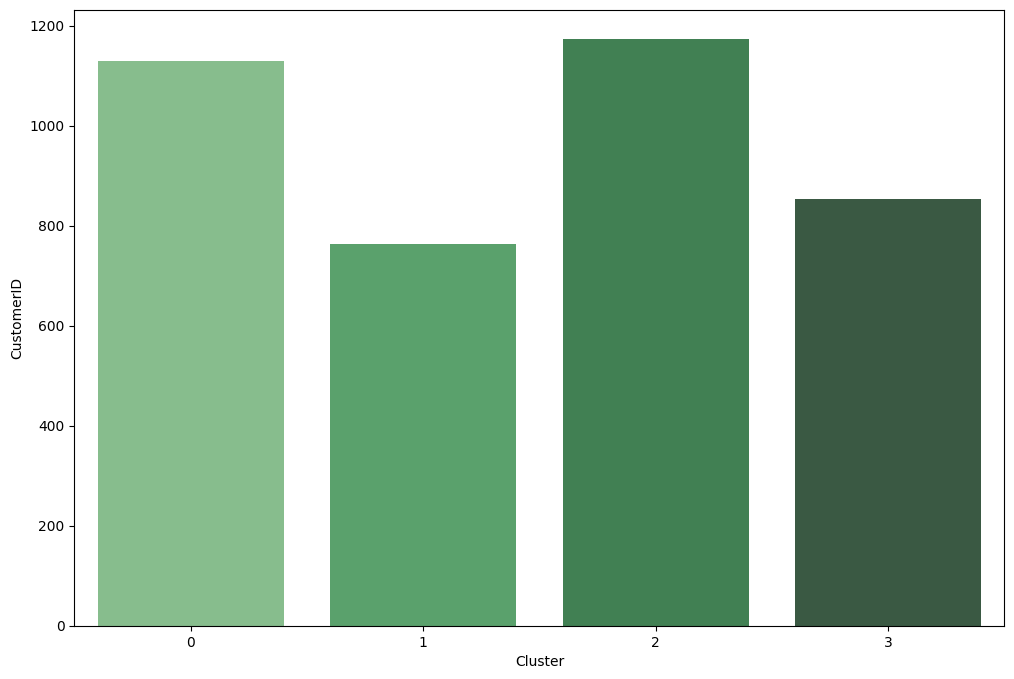

In [84]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Greens_d");

In [87]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)

    return df_new


rfm_values(df_rfm_k4)


Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          89.0      81.0   1448.0  1130
1          24.0      30.0    463.0   763
2         197.0      15.0    293.0  1173
3          12.0     260.0   5825.0   854

- "Cluster 0" has 29% customers. It belongs to the "Loyal Customers" segment as they Haven’t purchased for some time, but used to purchase frequently (F=2) and spent a lot. (R=3, F=2, M=2)

- "Cluster 1" has 20% customers. It can be interpreted as "Alomost Lost". They purchase recently (R=2). However they do not purchase frequently and do not spent a lot. (R=2, F=3, M=3)

- "Cluster 2" has 30% customers. It can be interpreted as "Lost Cheap Customers". Their last purchase is long ago (R=4), purchased very few (F=4) and spent little (M=4). (R=4, F=4, M=4)

- "Cluster 3" has 21% customers. It belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=1), frequent buyers (F=1), and spent the most (M=1). (R=1, F=1, M=1)

# Recommendation
- Recommendation for “Best Customers" segment: Focus on increasing customer purchases therefore it is necessary to form a cross/Up Selling Strategy.

- Recommendation for “Loyal Customers" segment: The business team must optimize the budget campaign and the time campaign for this customer segment in order to maintain their loyalty and increase their value.

- Recommendation for “Almost Lost" segment: This customer segment is very at risk for churn, so focus on activating customers and making repurchases by forming a Reactivation Strategy, Retention Strategy.

- Recommendation for “Lost Cheap Customers" segment: This customer segment has churned, so the focus of the campaign is to reactivate the customer by forming a Reactivation strategy.

Thanks for reading

charles.wiredu@bsu.edu